<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

We want to predict whether or not the same donor will give blood the next a blood donation drive is conducted. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:


    0 - the donor will not give blood
    1 - the donor will give blood

Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from scipy import stats

In [2]:
# Read data in pandas
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data", delimiter=',')
# Check data has loaded correctly
data.head(1)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Perform EDA by investigating each of the points above 

In [4]:
#no. of features & dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
#find and remove outliers using Zscore
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

data = data[filtered_entries]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 1 to 745
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            729 non-null    int64
 1   Frequency (times)                           729 non-null    int64
 2   Monetary (c.c. blood)                       729 non-null    int64
 3   Time (months)                               729 non-null    int64
 4   whether he/she donated blood in March 2007  729 non-null    int64
dtypes: int64(5)
memory usage: 34.2 KB


In [16]:
#checked for nulls and found none
data.isna()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
...,...,...,...,...,...
741,False,False,False,False,False
742,False,False,False,False,False
743,False,False,False,False,False
744,False,False,False,False,False


In [10]:
#identified that col4 might be categorical. look at vcounts
data.iloc[:, [4]].value_counts()

whether he/she donated blood in March 2007
0                                             558
1                                             171
dtype: int64

In [11]:
# Print target incidence proportions, rounding output to 3 decimal places
data.iloc[:, [4]].value_counts(normalize=True).round(3)

whether he/she donated blood in March 2007
0                                             0.765
1                                             0.235
dtype: float64

We will use balancedrandomforest/kfoldcross validation. As proposed in Breiman (2001), random forest induces each constituent tree from a bootstrap sample of the training data. In learning extremely imbalanced data, there is a significant probability that a bootstrap sample contains few or even none of the minority class, resulting in a tree with poor performance for predicting the minority class. A naıve way of fixing this problem is to use a stratified bootstrap; i.e., sample with replacement from within each class.

https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

TPOT picked logistic regression as the best data pipeline for this project. however we will ignore it as this notebook relates to RandomForest

In [12]:
data.columns 

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [13]:
data.columns =['recency', 'frequency','blood__cc', 'time_months', 'target']

In [36]:
from sklearn.model_selection import StratifiedKFold

X=data[['recency', 'frequency','blood__cc', 'time_months']]  # Features
y=data[['target']]  # target

skf = StratifiedKFold(n_splits=2,random_state=None,shuffle=False)
for train_index,test_index in skf.split(X,y):
    print("Train:",train_index,'Test:',test_index)
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]

Train: [239 248 249 257 259 261 277 283 284 285 286 301 314 317 319 324 328 329
 331 334 360 364 365 370 389 390 391 392 393 394 395 396 397 398 399 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472
 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490
 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508
 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526
 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544
 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562
 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580
 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598
 599 600 601 602 603 604 605 606 607 608 609

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(365, 4)
(364, 4)
(365, 1)
(364, 1)


In [38]:
y_train.value_counts(normalize=True).round(3)

target
0         0.764
1         0.236
dtype: float64

In [39]:
#did not balance very well. we can try other methods like balancedrandomforest on the train test data

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [27]:
data.columns

Index(['recency', 'frequency', 'blood__cc', 'time_months', 'target'], dtype='object')

In [41]:
# Choose a model or models
from sklearn.ensemble import RandomForestClassifier
#Create a randomforest classifier
clf=RandomForestClassifier()

# Step 9: Fit the Model

In [42]:
# Fit model
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

<ipython-input-42-02a2d5db2c45>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [45]:
y_train_pred = clf.predict(X_train)
y_train_pred_prob = clf.predict_proba(X_train)

In [46]:
train_tn, train_fp, train_fn, train_tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()
train_cm = pd.DataFrame(index = ['Predicted Positive', 'Predicted Negative'], columns = ['Actual Positive', 'Actual Negative'])
train_cm.iloc[0,0] = train_tp
train_cm.iloc[0,1] = train_fp
train_cm.iloc[1,0] = train_fn
train_cm.iloc[1,1] = train_tn
train_cm

,Actual Positive,Actual Negative
Predicted Positive,65,1
Predicted Negative,21,278


In [47]:
accuracy_score = metrics.accuracy_score(y_train, y_train_pred)
accuracy_score

0.9397260273972603

In [48]:
recall_score = metrics.recall_score(y_train, y_train_pred)
recall_score

0.7558139534883721

In [49]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)
train_rocauc = metrics.auc(fpr,tpr)

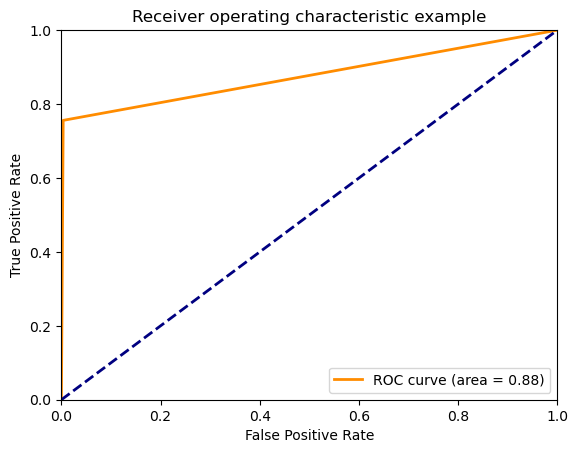

In [50]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % train_rocauc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [52]:
y_test_pred = clf.predict(X_test)
y_test_pred_prob = clf.predict_proba(X_test)
y_test_pred_prob

array([[0.95      , 0.05      ],
       [1.        , 0.        ],
       [0.94016667, 0.05983333],
       [0.99      , 0.01      ],
       [0.98      , 0.02      ],
       [0.97166667, 0.02833333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99      , 0.01      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99      , 0.01      ],
       [0.89      , 0.11      ],
       [0.96      , 0.04      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.97      , 0.03      ],
       [1.        , 0.        ],
       [1.

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



